# PCA

PCA(Principal Component Analysis)는 주성분 분석이라고도 하며 차원 축소를 통해 최소 차원의 정보로 원래 차원의 정보를 모사(approximate)하려는 작업을 말한다.

## 차원 축소

목적사용: 데이터의 특징과 insight를 얻기위해 사용, 회귀분석을 할때 regularization 할때 오버피팅 방지를 하기 위하여 쓰임
(overfitting 방지: 차원이 많을수록 R-squared가 좋아지니깐 오버피팅됨, 필요없는 차원을 삭제하는 방법으로 사용) 

차원 축소란(Dimension Reduction) 고차원 벡터에서 일부 차원의 값을 모두 0으로 만들어(truncation) 저차원 벡터로 줄이는 것을 말한다.

다만 원래의 고차원 벡터의 특성을 최대한 살리기 위해 가장 분산이 높은 방향으로 회전 변환(rotation transform)을 한다.

3차원의 데이터를 2차원이나 1차원으로 줄임 

방법: 4개의 feature중 3개를 삭제 하거나 또는 4개의 feature의 대표지수를 뽑아 반영
예1: 축구에서 팀마다 20개의 포지션이있다고 한다면 수비수 스펙대표지수, 공격수 스팩 대표지수 2개만 뽑아 차원축소 
예2: 데이터벡터 또는 행렬에 대하여 지수를내적 하여 스칼라값으로 변환 -차원축소됨 
(4개의 feature를 가진 데이터 1개를 1*4 의 지수,특징 벡터를 곱하여 스칼라 값으로 전환함)

<img src="https://alliance.seas.upenn.edu/~cis520/dynamic/2014/wiki/uploads/Lectures/pca-example-1D-of-2D_small.png" style="width:40%; margin: 0 auto 0 auto;">


<img src="http://www.nlpca.org/fig_pca_principal_component_analysis.png" style="width:90%; margin: 0 auto 0 auto;">

## PCA와 고유값 분해

$D$ 차원의 데이터 $x$가 $N$개 있다. 이 데이터는 특징 행렬 $X \in \mathbf{R}^{N\times D}$로 나타낼 수 있다.
이 데이터를 가능한한 쓸모있는 정보를 유지하면서 더 적은 고정된 차원인 $M (M < D)$ 차원의 차원축소 벡터 $\hat{x}$으로 변환하고자 한다. 

PCA(Principal Component Analysis) 방법은 선형 변환을 사용한다. 다음과 같이 변환 행렬 $W \in \mathbf{R}^{D \times M}$을 사용하는 선형 변환을 생각하자.

$$
\hat{x}_i = W^T x_i
$$

이를 행렬식으로 바꾸면 다음과 같다.

$$
\hat{X} = XW
$$

PCA의 목표는 변환 결과인 차원축소 벡터 $\hat{x}_i$가 원래의 벡터 $x_i$와 가장 유사하게 되는 $W$ 값을 찾는 것이다. 

(PCA는 무손실 압축이 아닌 오리지널 데이터를 인코딩하여 변환하는 과정에서 손실을 가진다. 다시 디코딩할때 오리지널 데이터와 똑같이 만들기 위해 가중치 행렬을 찾는 것이 PCA의 목표이다) 

그러나 $\hat{x}_i$는 $M(M < D)$ 차원 벡터로 원래의 $D$ 차원 벡터 $x_i$와 차원이 다르기 때문에 유클리드 거리 등의 유사성을 직접 계산할 수가 없다. 따라서 $\hat{x}_i$를 도로 $D$ 차원 벡터로 선형 변형하는 최적의 변환행렬 $V \in \mathbf{R}^{M \times D}$를 찾아야 한다. 

우선 이런 역변환 행렬 $V$가 존재한다고 가정하자. 그러면 원래의 데이터 벡터 $x$를 더 낮은 차원의 데이터 $\hat{x} = W^Tx $으로 변환했다가 다시 원래의 차원으로 되돌릴 수 있다. 

$$ \hat{\hat{x}} = V^T \hat{x} $$

물론 이렇게 되돌린 벡터 $V^T \hat{x}$은 원래의 벡터 $x$와 비슷할 뿐 같은 값은 아니다. 단 이 값을 다시 차원축소 변환하면 도로 $\hat{x}$가 되도록 할 수는 있다. 즉,

$$ W^T \hat{\hat{x}} = W^T V^T \hat{x} = \hat{x} $$

$$ W^T V^T = I $$

역변환 행렬 $V$을 알고 있다고 가정하고 역변환을 했을 때 원래 벡터 $x$와 가장 비슷해지는 차원축소 벡터 $\hat{x}$를 다음과 같이 최적화를 이용하여 찾는다.(원래의 X의 값을 가지도록 최대한 노력한다) 

$$
\arg\min_{\hat{x}} || x - V^T \hat{x} ||^2
$$

목적함수는 다음과 같이 바꿀 수 있다.

$$
\begin{eqnarray}
|| x - V^T \hat{x} ||^2 
&=& (x - V^T \hat{x})^T (x - V^T \hat{x}) \\
&=& x^Tx - 2 x^T V^T \hat{x} + \hat{x}^T V V^T \hat{x} \\
\end{eqnarray}
$$

이 식을 $\hat{x}$로 미분하면,

$$ - 2 Vx + 2VV^T \hat{x} = 0$$

이 문제를 풀기 위해 $V$의 각 열이 서로 수직이고 크기가 1이라고 가정한다. 

$$ VV^T = I $$

이렇게 가정하면 

$$ \hat{x} = Vx $$

가 된다. 원래의 변환식 

$$ \hat{x} = W^Tx $$

과 비교하면

$$ V = W^T $$

임을 알 수 있다. 즉 원래 변환행렬의 전치행렬이 최적의 역변환 행렬이다. 따라서 다음 식도 성립한다.

$$ W^TW = I $$

이제 남은 문제는 최적의 변환행렬 $W$을 찾는 것이다. 이 경우의 최적화 문제는 다음과 같이 된다.

$$
\arg\min_{W} \sum_{i=1}^N || x_i - W W^T x_i ||^2
$$

단 $W$는 $ W^TW = I $를 만족한다.

목적함수는 다음과 같이 바꾸어 쓸 수 있다. (너무어려운공식이라서 결론만: 공분산행렬 XX.T를 고유분해하면 람다가 생김 

$$
\arg\min_{W} || X - X W W^T ||^2_{F}
$$

여기에서 
$$ || A ||_F = \sqrt{ \sum_i \sum_j a_{ij}^2 } = \sqrt{ tr (A^TA) } $$

이 최적화 문제의 답은 공분산 행렬 $XX^T$의 고유값 분해를 사용하여 찾을 수 있다. $W$의 각 열은 가장 큰 고유값부터 $\hat{D}$개의 순차적인 고유값에 대응하는 고유 벡터로 이루어진다. (아이겐벡터: 가우시안 정규분포의 경우에 고유분해로 뜯어보면 아이겐벡터가 좌표변환 벡터의 역할을 한다. 아이겐 벡터가 1:1인 걸로 정규화 시켜줌)  

## 가우시안 정규 분포의 좌표 변환

확률 변수의 공분산 행렬 $\Sigma$ 은 대칭 행렬이므로 위의 관계가 성립하고 따라서 다변수 가우시안 정규 분포의 확률 밀도 함수는 다음과 같이 표시할 수 있다.

$$
\begin{eqnarray}
\mathcal{N}(x \mid \mu, \Sigma) 
&=& \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right) \\
&=& \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T V \Lambda^{-1} V^T (x-\mu) \right) \\
&=& \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (V^T(x-\mu))^T  \Lambda^{-1} (V^T (x-\mu)) \right) \\
&=& \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} x'^T  \Lambda^{-1} x' \right) \\
\end{eqnarray}
$$

즉 고유벡터 행렬 $V$ 를 변환 행렬로 사용하여 $x$ 를 $x' = V^T(x-\mu)$ 로 좌표 변환하면, 좌표 변환된 새로운 $x'$ 들의 공분산 행렬은 대각 행렬인 고유값 행렬 $\Lambda$ 가 된다. 즉 좌표 변환된 $x'$ 들은 서로 독립인 성분이 된다. 또한 고유벡터 행렬 $V$의 각 열, 즉 고유 벡터들은 독립인 성분을 가리키는 기저 벡터가 된다. 

이 사실이 주성분 분석에서 사용된다.

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


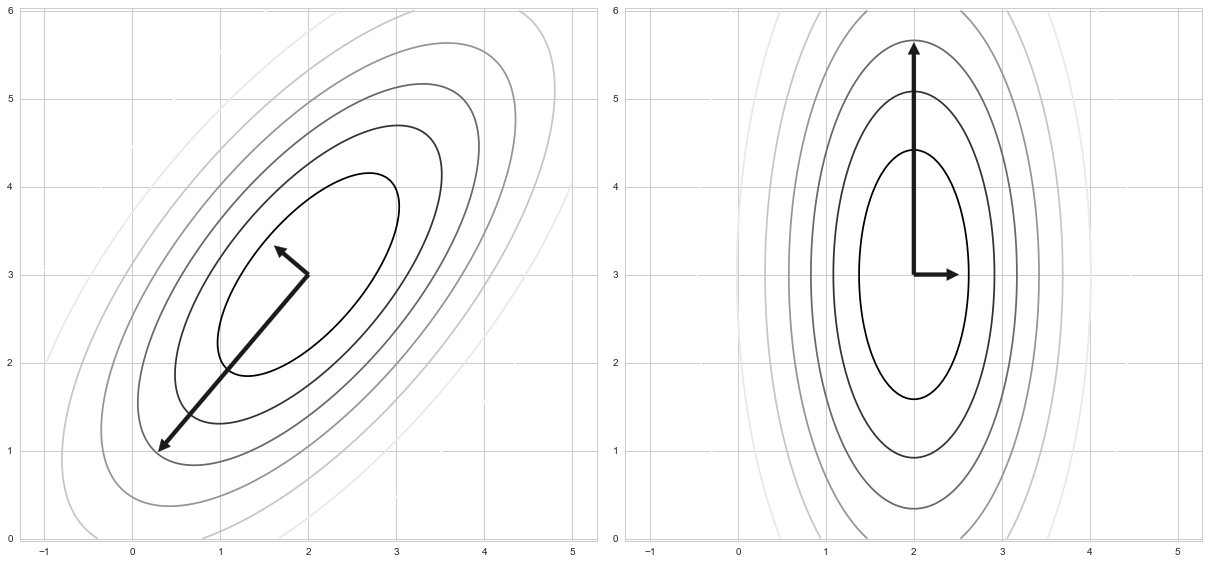

In [5]:
##스타트업 파일

from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()


mu = [2, 3]
cov = [[4, 3],[3, 5]]
w, V = np.linalg.eig(cov)

xx = np.linspace(-1, 5, 120)
yy = np.linspace(0, 6, 150)
XX, YY = np.meshgrid(xx, yy)

plt.figure(figsize=(17, 8))

plt.subplot(121)
rv1 = sp.stats.multivariate_normal(mu, cov)
plt.contour(XX, YY, rv1.pdf(np.dstack([XX, YY])))
plt.annotate('', xy=(mu + 0.35 * w[0] * V[:,0]), xytext=mu, arrowprops=dict(facecolor='k'))
plt.annotate('', xy=(mu + 0.35 * w[1] * V[:,1]), xytext=mu, arrowprops=dict(facecolor='k'))
plt.axis("equal")

plt.subplot(122)
rv2 = sp.stats.multivariate_normal(mu, w) # 좌표 변환
plt.contour(XX, YY, rv2.pdf(np.dstack([XX, YY])))
plt.annotate('', xy=(mu + 0.35 * w[0] * np.array([1, 0])), xytext=mu, arrowprops=dict(facecolor='k'))
plt.annotate('', xy=(mu + 0.35 * w[1] * np.array([0, 1])), xytext=mu, arrowprops=dict(facecolor='k'))
plt.axis("equal")

plt.tight_layout()
plt.show()

## 분산이 큰부분이 아이겐벡터로 사용됨 여기서 아이겐 벨류가 곱해져서 기준이 되는 중심축의 길이가 달라보이나 
## 원래 중심축에서는 정규화된 아이겐벡터가 보임 거기에 곱하기 아이겐 벨류 
## 중심축이 길이가 긴 부분이 데이터가 그쪽으로 뻗어있다는것을 뜻함 
## 하기와 같이 좌표변환이 가능하다면 오른쪽과 바꾸고 marginal 을 비교하고 x 축으로 자르거나 y축으로 잘라서 비교하기 훨씬 쉽다 

### Scikit-Learn 의 PCA 기능

Scikit-Learn 의 decomposition 서브패키지는 PCA분석을 위한 `PCA` 클래스를 제공한다. 사용법은 다음과 같다.


* 입력 인수:	
  * n_components : 정수 (최종 몇개 output 으로 남기고 싶은 성분의 개수) 
    * 최종 성분의 수


* 속성:	
 * `components_` 
    * 주성분 축
 * `n_components_` 
    * 주성분의 수
 * `mean_` :
    * 각 성분의 평균
 * `explained_variance_ratio_` 
    * 각 성분의 분산 비율


## 2차원 PCA의 예

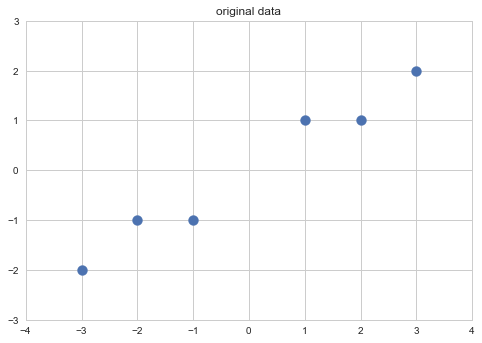

In [7]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("original data")
plt.show()

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [3]:
Z = pca.transform(X)
Z

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

In [4]:
w, V = np.linalg.eig(pca.get_covariance())

In [5]:
V.T.dot(X.T).T ## 위의 식 과 같음  ## Z = pca.transform(X)

array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

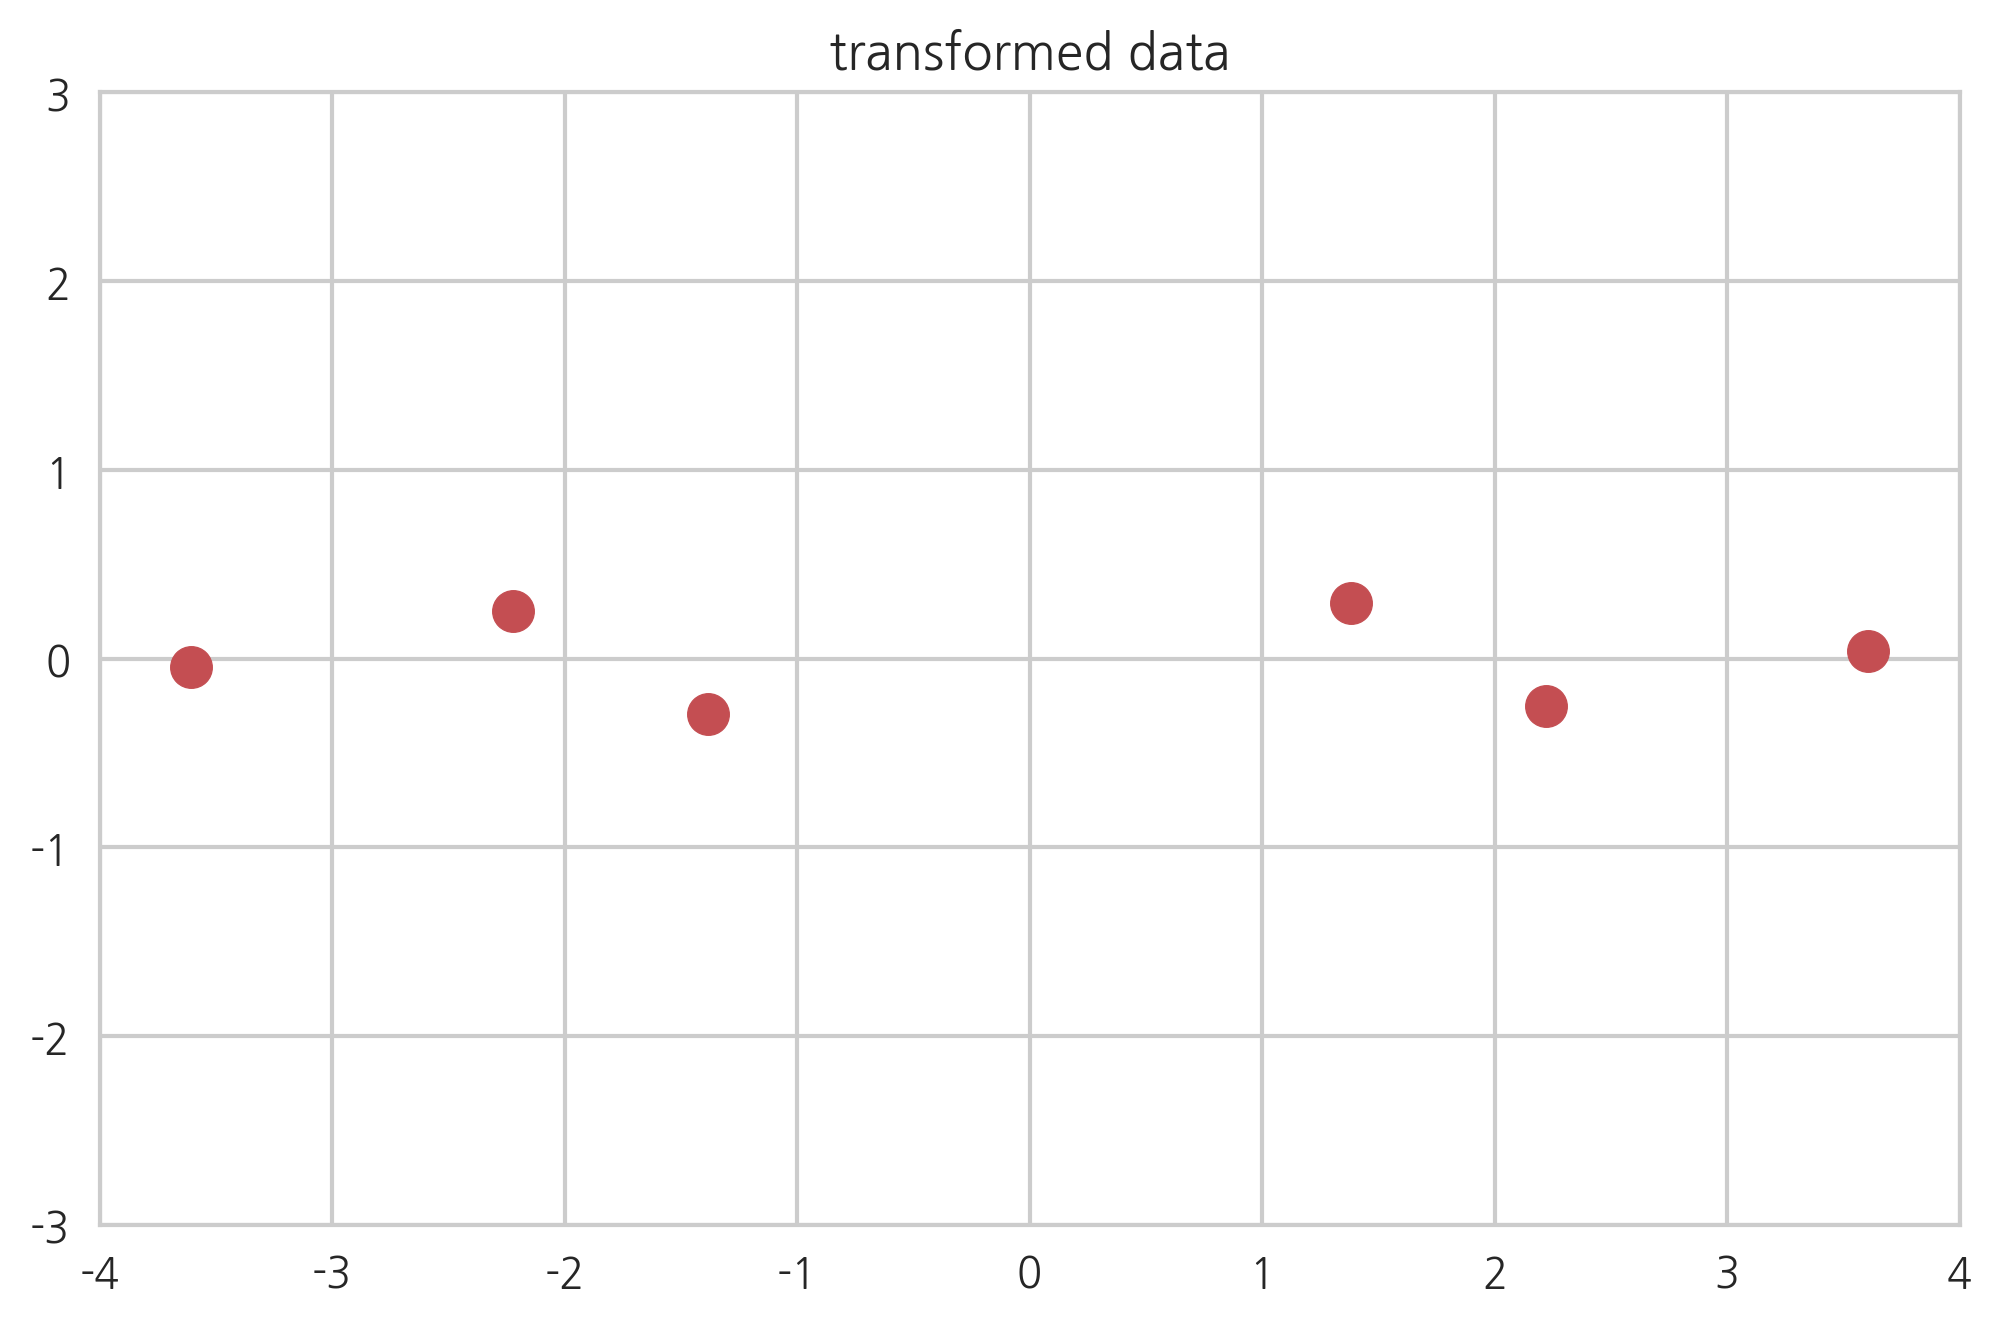

In [6]:
plt.scatter(Z[:,0], Z[:,1], c='r', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed data") ## 좌표번환됨 
plt.show()

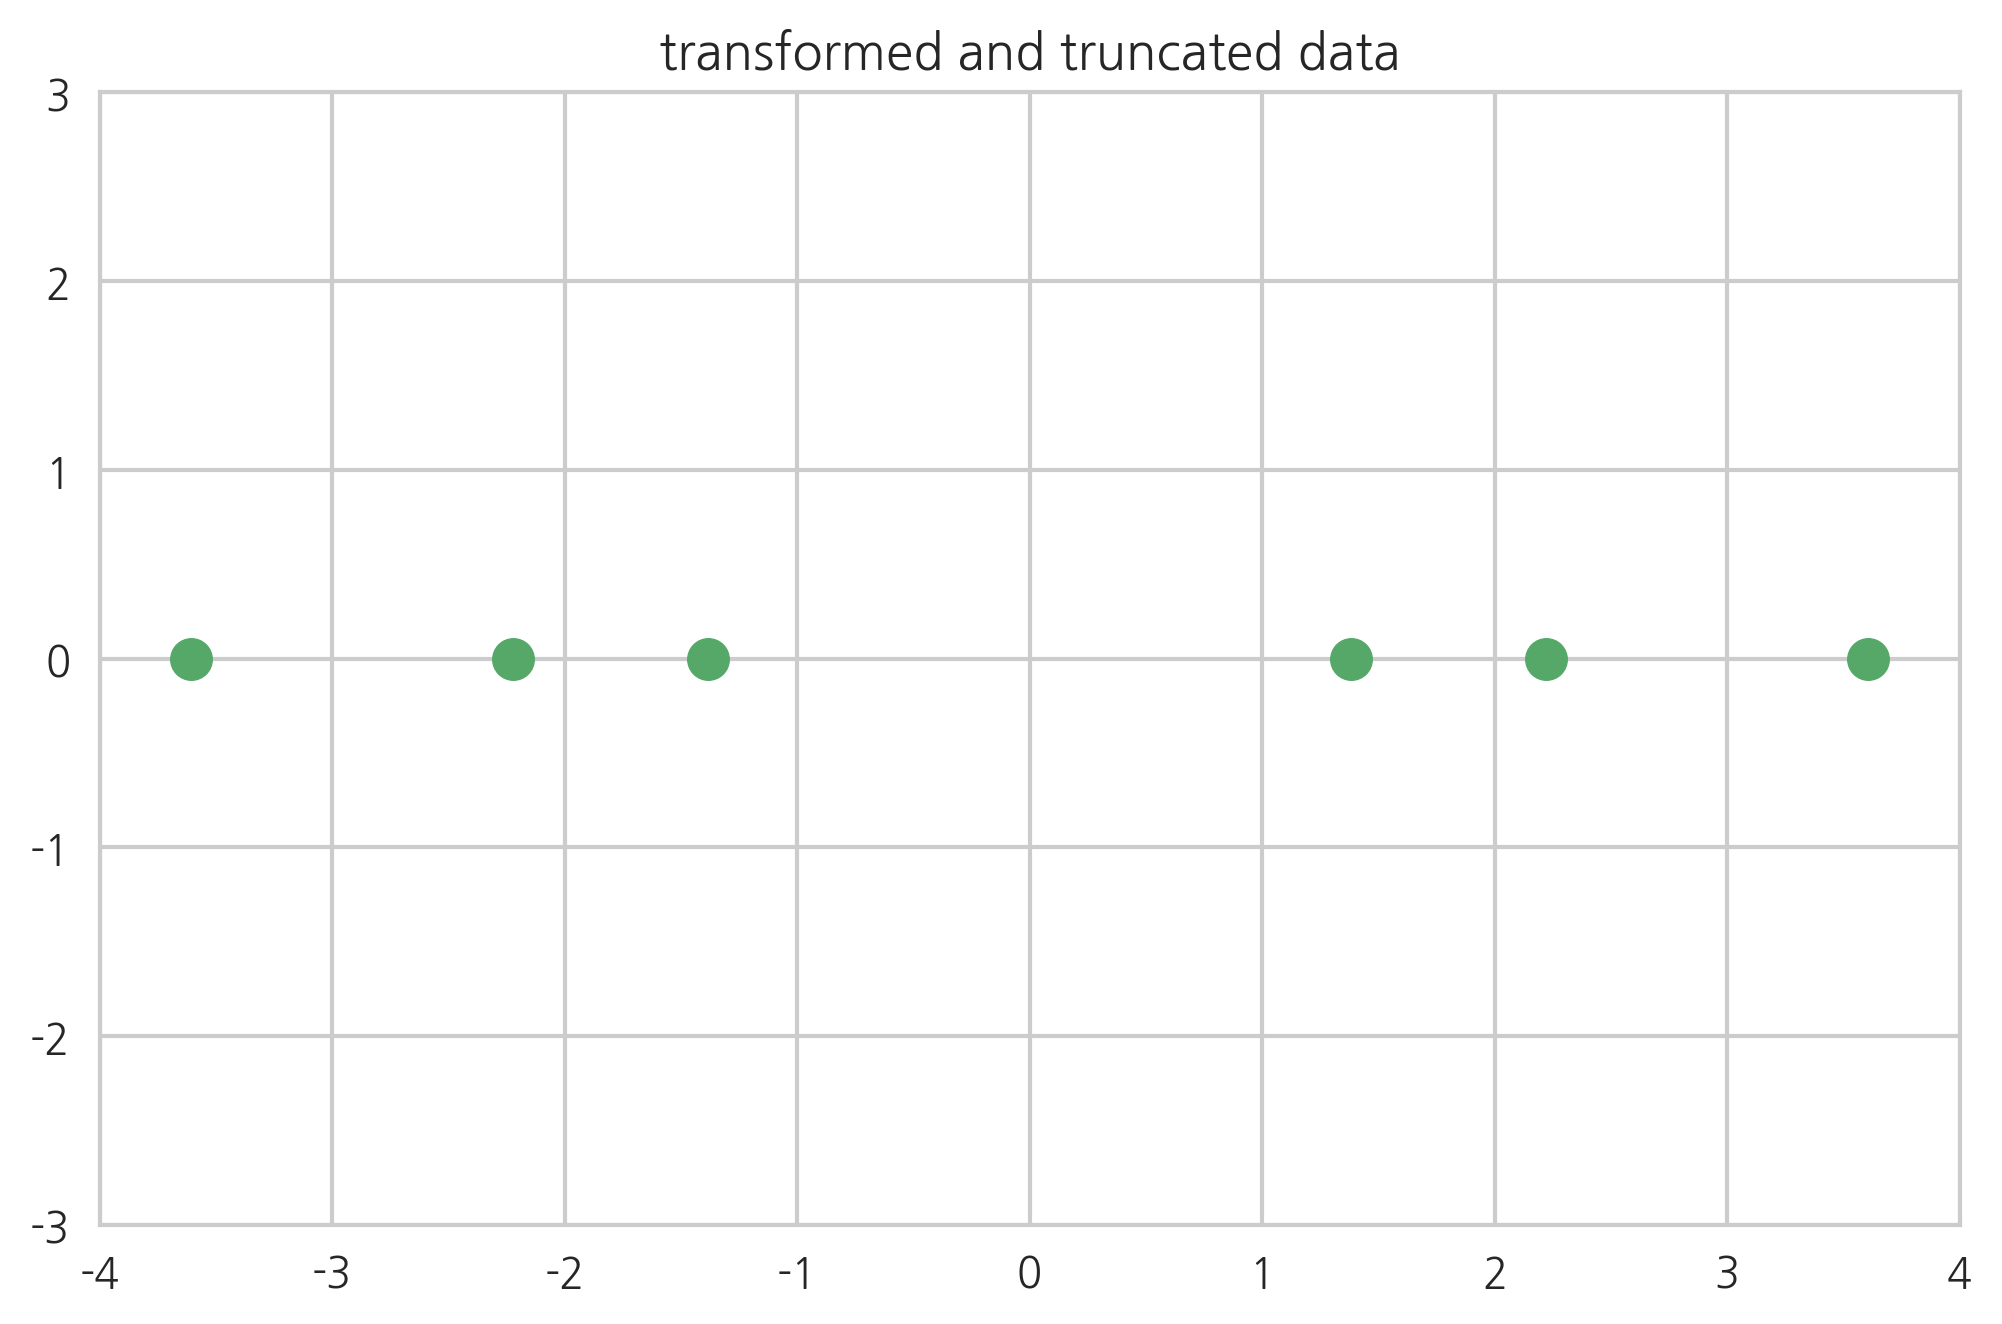

In [7]:
plt.scatter(Z[:,0], np.zeros_like(Z[:,1]), c='g', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed and truncated data") ## 가로축에 좌표변환되어서 2차원의 차원이 필요가 없음 1차원으로 변경가능 
plt.show() ## 분류 쉽게 가능 

## IRIS 데이터의 예

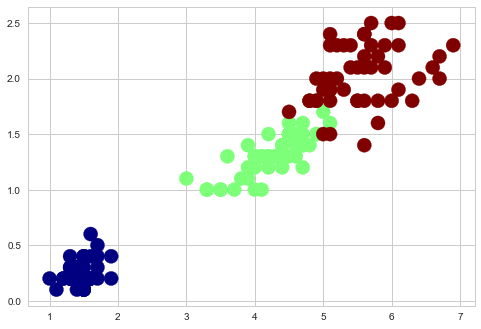

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:] ## feature중 두개만 사용 0번째,1번째 
plt.scatter(X[:, 0], X[:, 1], c=iris.target, s=200, cmap=plt.cm.jet);

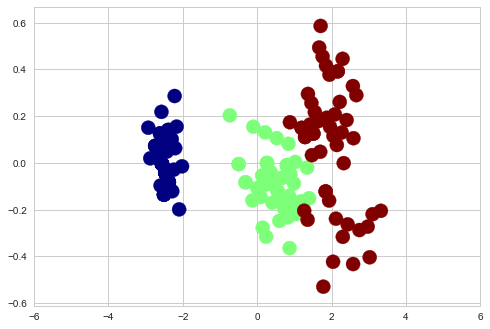

In [11]:
model2 = PCA(2).fit(X) ## 회전 2개의 주성분 분석으로 좌표변환과 데이터 변경을 해줌 ## 세로줄로 잘라서 분류를 좀더 하기 쉽게 해줌 
X2 = model2.transform(X)
plt.scatter(X2[:, 0], X2[:, 1], c=iris.target, s=200, cmap=plt.cm.jet)
plt.xlim(-6, 6)
plt.show()

In [10]:
model2.components_ 


array([[ 0.92154695,  0.38826694],
       [-0.38826694,  0.92154695]])

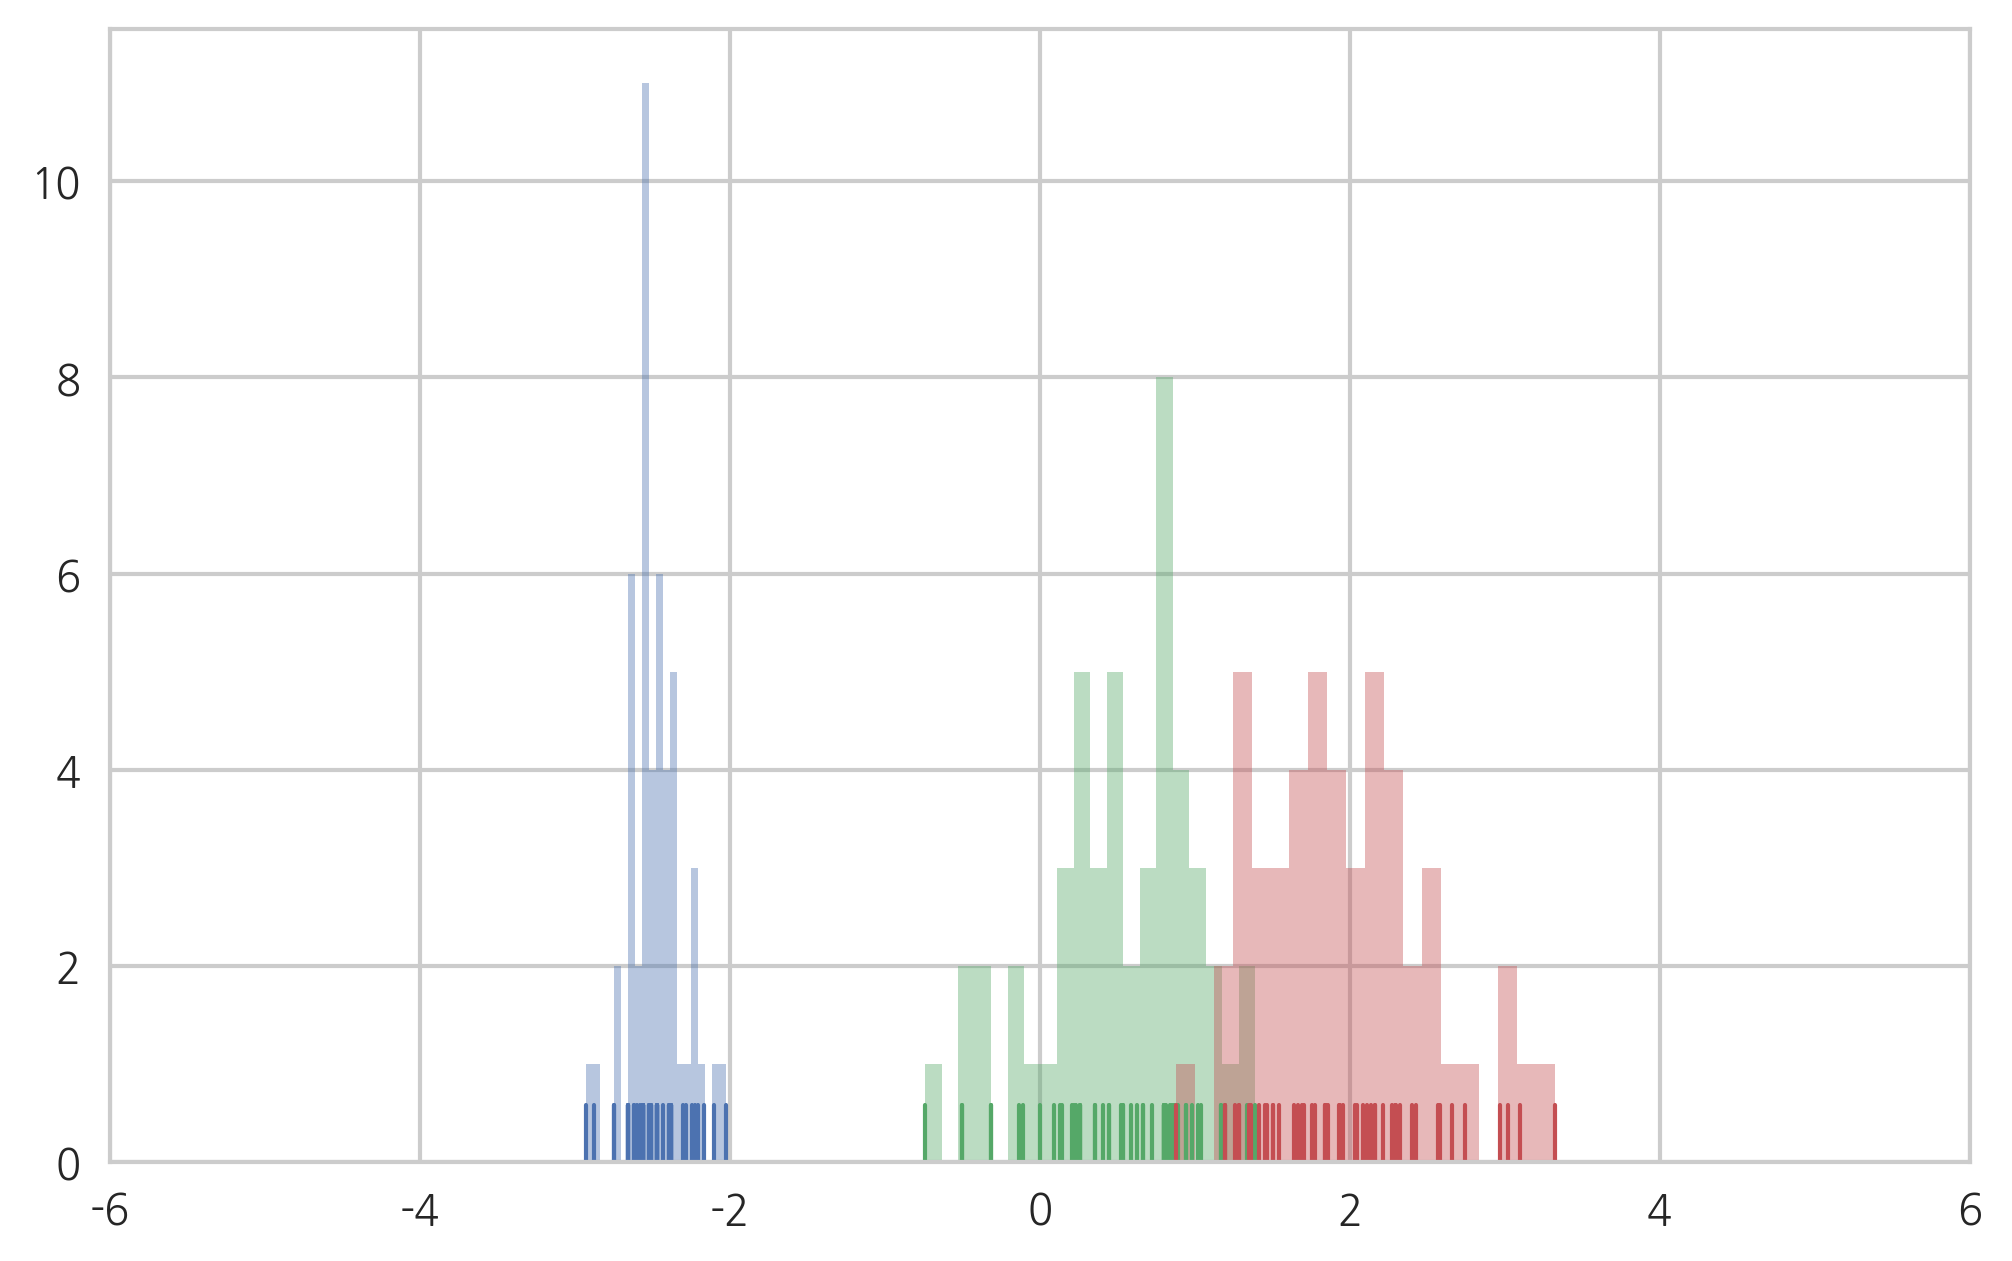

In [11]:
model1 = PCA(1).fit(X)
X1 = model1.transform(X)
sns.distplot(X1[iris.target==0], color="b", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==1], color="g", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==2], color="r", bins=20, rug=True, kde=False)
plt.xlim(-6, 6)
plt.show() ## 위의 변경된 데이터들을 눌러서 distribution보여줌 

In [12]:
model1.components_ ## 1차원 
##(0.92154695* 꽃잎의 길이, 0.38826694* 꽃잎의 폭) =꽃의 크기를 나타내는 지수가 2개이고 꽃의 크기지수들 대표 지수 2개 나타냄 

array([[ 0.92154695,  0.38826694]])

전체 데이터를 변환하면 다음과 같다.

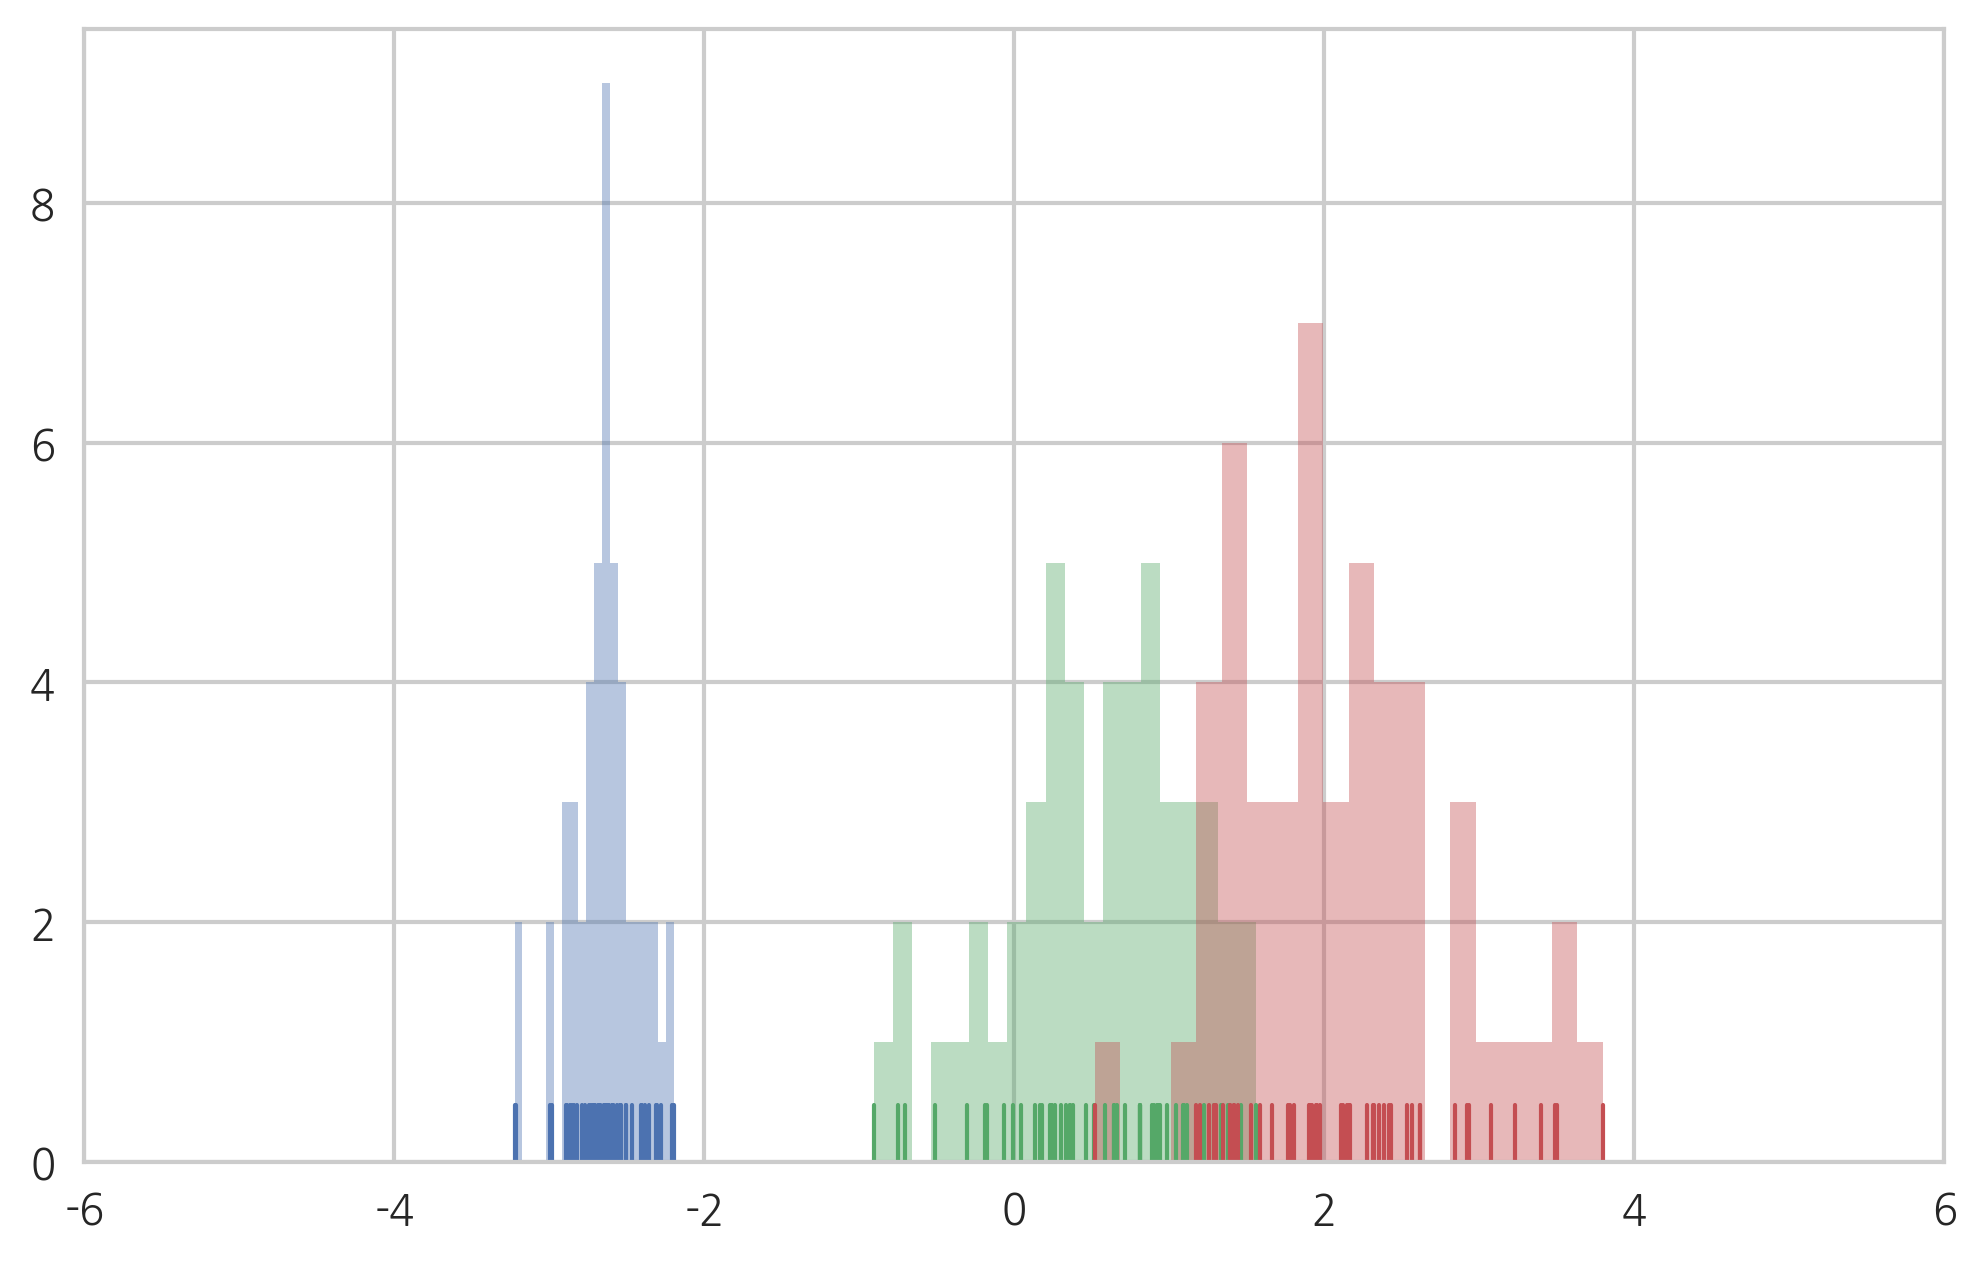

In [13]:
model1 = PCA(1).fit(iris.data) ## feature 4개 다 쓴경우 
X1 = model1.transform(iris.data)
sns.distplot(X1[iris.target==0], color="b", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==1], color="g", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==2], color="r", bins=20, rug=True, kde=False)
plt.xlim(-6, 6)
plt.show()

In [14]:
model1.components_  ## 1차원 
##(0.36158968* 꽃잎의 길이, -0.08226889* 꽃잎의 폭, 0.85657211*꽃받침의 길이, 0.35884393*꽃받침의 폭 ) =꽃의 크기를 나타내는 지수를 나타냄 

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393]])

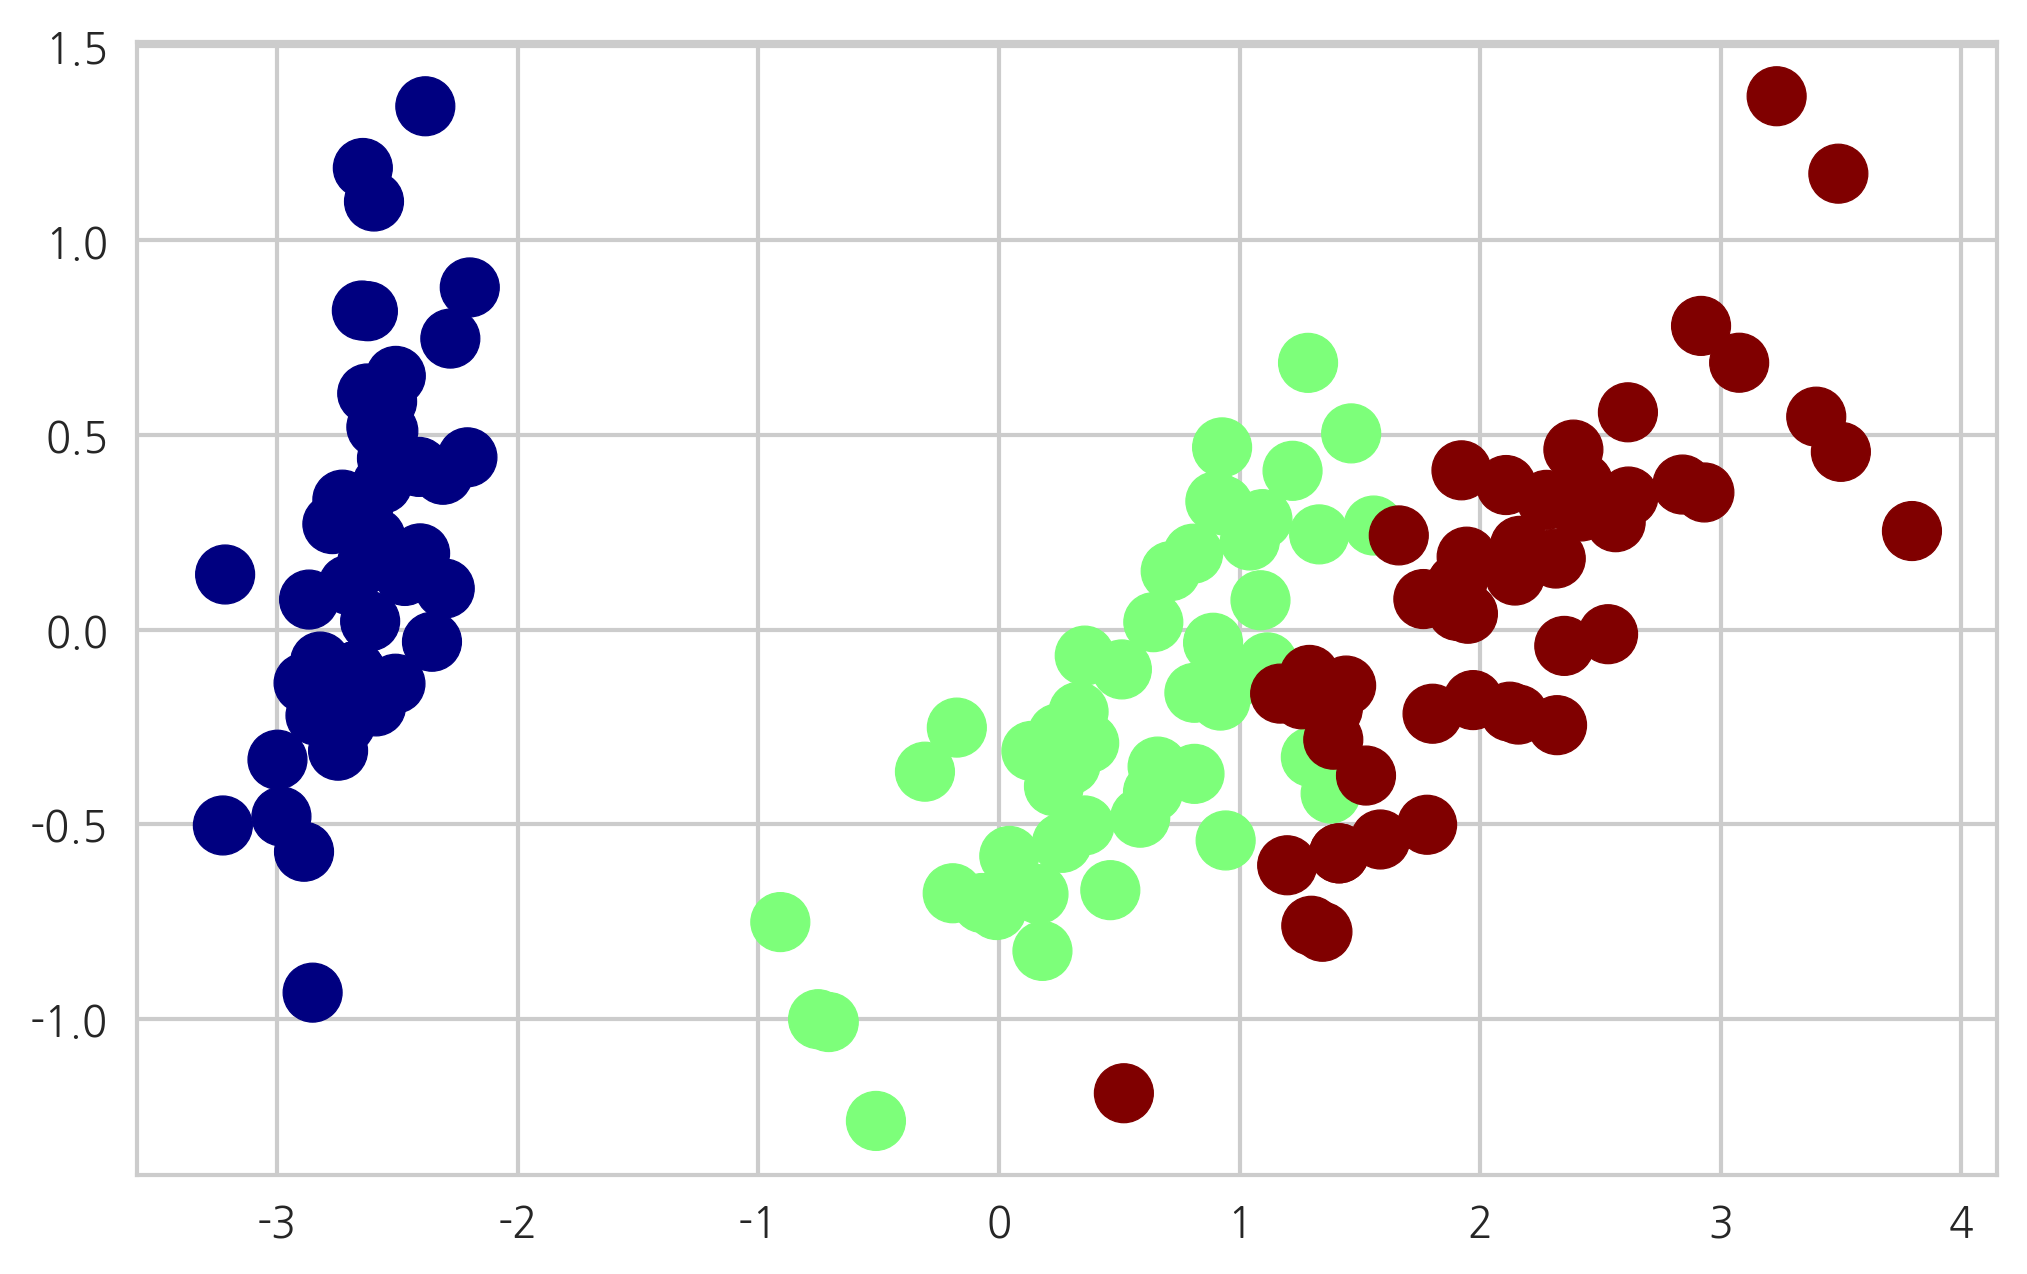

In [15]:
model2 = PCA(2).fit(iris.data) ## 2차원
X2 = model2.fit_transform(iris.data)
plt.scatter(X2[:, 0], X2[:, 1], c=iris.target, s=200, cmap=plt.cm.jet);

In [16]:
model2.components_## 2차원 
##(0.36158968* 꽃잎의 길이, -0.08226889* 꽃잎의 폭, 0.85657211*꽃받침의 길이, 0.35884393*꽃받침의 폭 )=꽃의 크기를 나타내는 지수를 나타냄 
##(0.65653988* 꽃잎의 길이, 0.72971237* 꽃잎의 폭, -0.1757674*꽃받침의 길이, -0.07470647*꽃받침의 폭 ) 총 2개의 벡터로 지수를 표현 

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

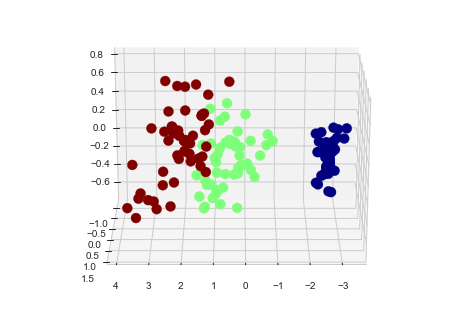

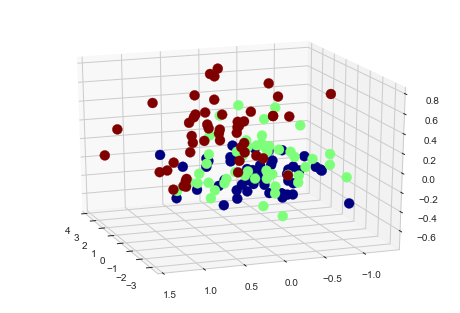

In [16]:
X3 = PCA(3).fit_transform(iris.data)
from mpl_toolkits.mplot3d import Axes3D

def plot_pca(azim):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(X3[:,0], X3[:,1], X3[:,2], c=iris.target, s=100, cmap=plt.cm.jet, alpha=1)
    ax.view_init(20, azim)

plot_pca(90) ## 90도로 시각을 변경 
plot_pca(-200) ## -200도 
## 저차원에서는 구별이 안되어도 고차원이 되면 구별이 되는 경우가 있음 

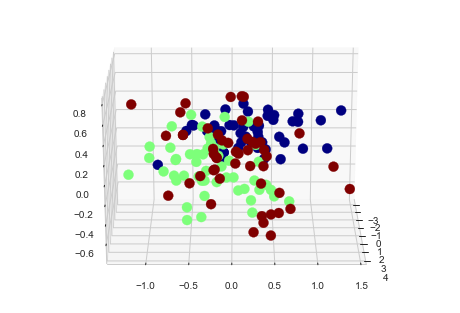

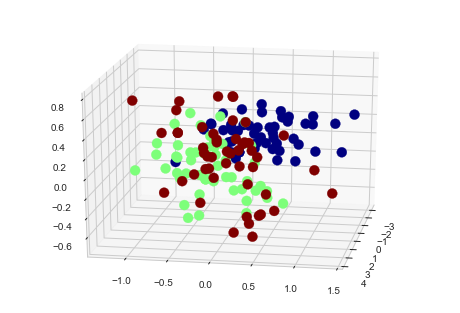

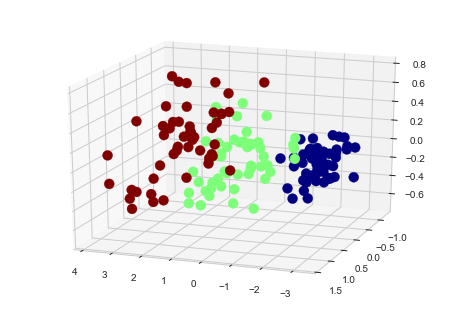

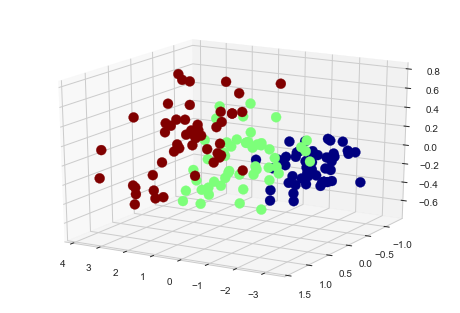

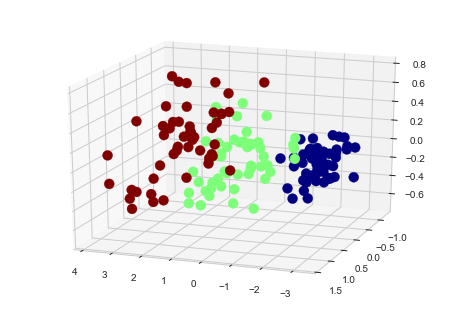

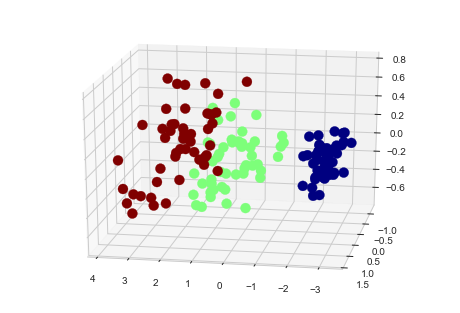

In [18]:
from ipywidgets import widgets
widgets.interact(plot_pca, azim=widgets.IntSlider(min=0, max=180, step=10, value=0));

## 이미지 PCA

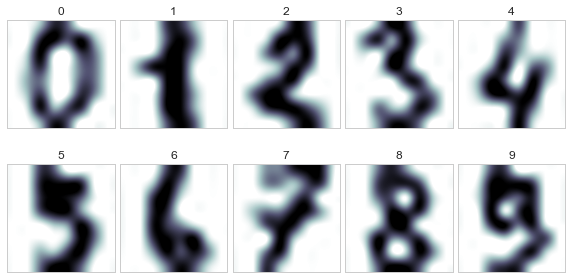

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

N=2; M=5;
fig = plt.figure(figsize=(10, 4))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone_r, interpolation="spline36")
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[k])

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_digits)
print(X_digits.shape)
print(X_pca.shape)

(1797, 64)
(1797, 10)


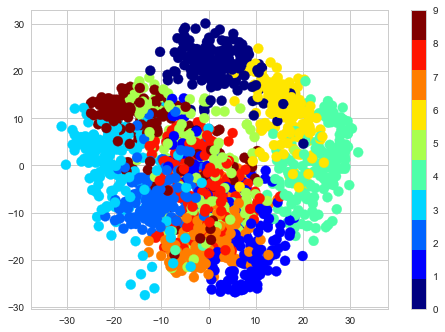

In [21]:
cmap = plt.cm.get_cmap('jet', 10)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_digits, s=100, cmap=cmap)
plt.axis("equal")
plt.colorbar()
plt.show() ## 색깔은 숫자를 나타냄

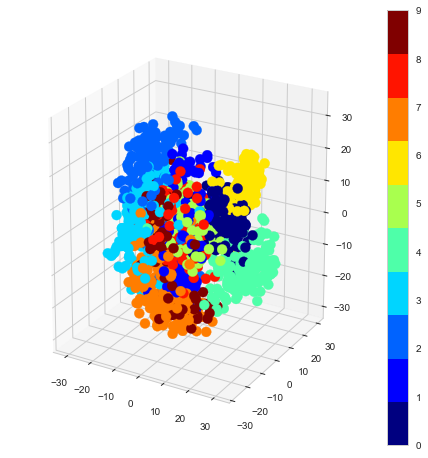

In [22]:
from mpl_toolkits.mplot3d import Axes3D

def plot_pca2(azim):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d');
    p = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y_digits, s=100, cmap=cmap, alpha=1)
    plt.colorbar(p)
    ax.view_init(20, azim)

plot_pca2(-60)

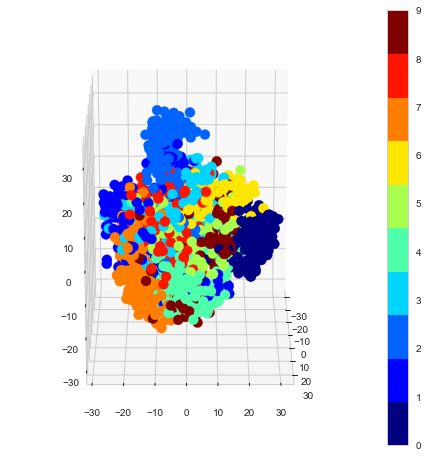

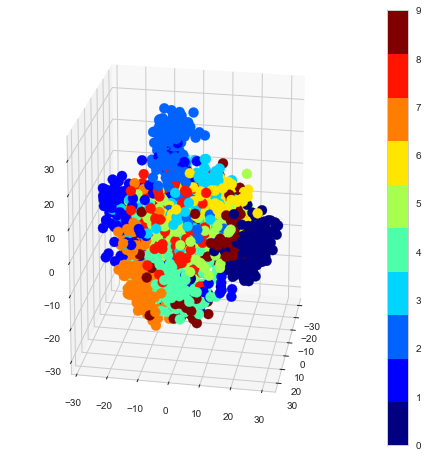

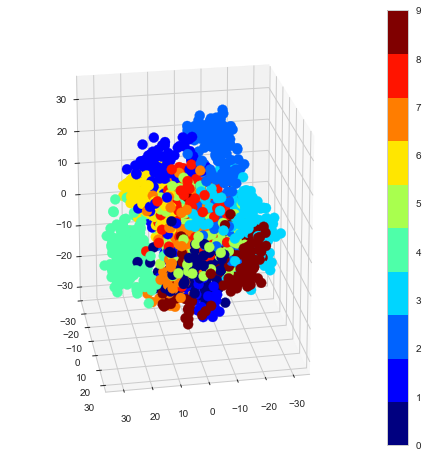

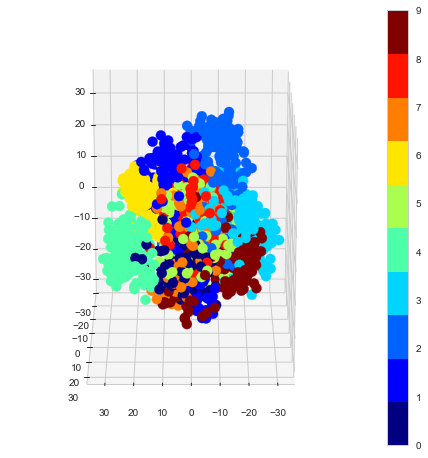

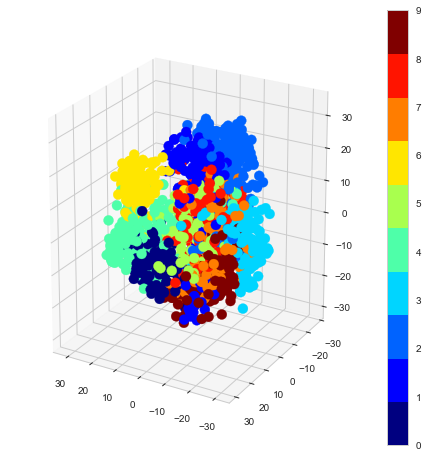

In [23]:
from ipywidgets import widgets
widgets.interact(plot_pca2, azim=widgets.IntSlider(min=0,max=180,step=10,value=0));

## 성분 수의 결정

성분의 수가 같은 PCA로 변환된 데이터의 공분산 행렬의 고유값은 원래 데이터의 공분산 행렬의 고유값과 일치한다.
성분의 수를 줄여야 하는 경우에는 가장 고유값이 작은 성분부터 생략한다.


* 원래의  데이터 $X$의 공분산 행렬 $X^TX$의 고유값
 $$ \lambda_1, \lambda_2, \lambda_3, \cdots, \lambda_D $$


* PCA 변환한   데이터 $Z$의 공분산 행렬 $Z^TZ$의 고유값
 $$ \lambda_1,  \cdots, \lambda_L $$


* Explained Variance 
$$ \dfrac{\lambda_1 +  \cdots + \lambda_L}{\lambda_1 + \lambda_2 + \lambda_3 + \cdots + \lambda_D} < 1$$

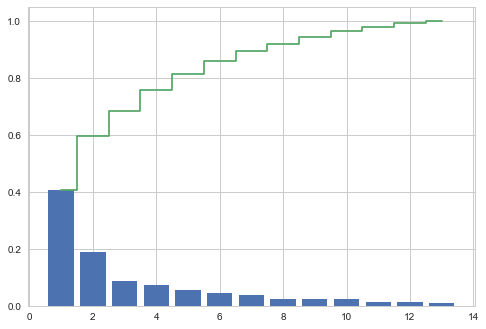

In [24]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA

wine = fetch_mldata("wine")
X, y = wine.data, wine.target

pca = PCA().fit(X)
var = pca.explained_variance_ ## 각성분의 분산비율 
cmap = sns.color_palette()
plt.bar(np.arange(1,len(var)+1), var/np.sum(var), align="center", color=cmap[0])
plt.step(np.arange(1,len(var)+1), np.cumsum(var)/np.sum(var), where="mid", color=cmap[1]) ## cumulated sum 
plt.show()